In [1]:
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\Ruchita Gayatri\Downloads\Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Nan Values 
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
# Data Imbalance
data['Churn'].value_counts()

0.0    50221
1.0    49779
Name: Churn, dtype: int64

In [28]:
data.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object

In [3]:
# Categorical to numerical 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['Gender'] = label.fit_transform(data['Gender'])
data['Location'] = label.fit_transform(data['Location'])

C:\Users\Ruchita Gayatri\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Dropping Data based on the target labels and making one class as minority

drop_proportion = 0.8
churn_label_1 = data[data['Churn'] == 1]
num_rows_to_drop = int(len(churn_label_1) * drop_proportion)
churn_label_1_dropped = churn_label_1.sample(frac=1 - drop_proportion, random_state=42)
#data2_0 = pd.concat([churn_label_1_dropped, data[data['Churn'] == 0]], ignore_index=True)

drop_proportion = 0.3
churn_label_2 = data[data['Churn'] == 0]
num_rows_to_drop = int(len(churn_label_2) * drop_proportion)
churn_label_2_dropped = churn_label_2.sample(frac=1 - drop_proportion, random_state=42)
#data2_1 = pd.concat([churn_label_2_dropped, data[data['Churn'] == 1]], ignore_index=True)

data2 = pd.concat([churn_label_1_dropped, churn_label_2_dropped], ignore_index=True)

X2 = data2.drop(columns=['CustomerID','Name','Churn'])
y2 = data2['Churn']

In [5]:
data2.shape

(45111, 9)

In [6]:
# Sampling the minority class and balancing the data 

import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3,
                           n_redundant=1, flip_y=0, n_features=20,
                           n_clusters_per_class=1, n_samples=1000,
                           random_state=10)

# Display class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Define the desired number of samples for the minority class
desired_samples = 40000  # Increase the desired number of samples

# Calculate the required sampling ratio
sampling_ratio = {0: desired_samples, 1: desired_samples}

# Apply SMOTE for oversampling with the desired ratio
smote = SMOTE(sampling_strategy=sampling_ratio, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X2, y2)

# Display class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution before oversampling: Counter({1: 900, 0: 100})


C:\Users\Ruchita Gayatri\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (40000) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 35155)
  warnings.warn(
C:\Users\Ruchita Gayatri\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (40000) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 35155)
  warnings.warn(


Class distribution after oversampling: Counter({1.0: 40000, 0.0: 40000})


In [7]:
X_resampled

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,45.000000,0,3,5.000000,44.550000,388.000000
1,38.000000,1,2,24.000000,97.620000,153.000000
2,49.000000,1,0,1.000000,34.270000,296.000000
3,52.000000,1,3,6.000000,95.280000,366.000000
4,43.000000,0,1,2.000000,53.050000,345.000000
...,...,...,...,...,...,...
79995,56.593765,0,2,8.187529,32.989749,231.781294
79996,58.123865,0,2,11.575227,58.849630,143.424773
79997,39.475223,0,1,11.475223,77.271431,421.895045
79998,61.349036,1,2,18.825482,90.858967,164.412741


In [8]:
# Repeating the same process but with altering the minortiy class 

y_resampled_df = pd.DataFrame(y_resampled, columns=['Churn'])
data1 = pd.concat([X_resampled, y_resampled_df], axis=1)

drop_proportion = 0.8
churn_label_1 = data1[data1['Churn'] == 1]
num_rows_to_drop = int(len(churn_label_1) * drop_proportion)
churn_label_1_dropped = churn_label_1.sample(frac=1 - drop_proportion, random_state=42)
data2_0 = pd.concat([churn_label_1_dropped, data[data['Churn'] == 0]], ignore_index=True)

drop_proportion = 0.3
churn_label_2 = data1[data1['Churn'] == 0]
num_rows_to_drop = int(len(churn_label_2) * drop_proportion)
churn_label_2_dropped = churn_label_2.sample(frac=1 - drop_proportion, random_state=42)
data2_1 = pd.concat([churn_label_2_dropped, data[data['Churn'] == 1]], ignore_index=True)

data2 = pd.concat([churn_label_1_dropped, churn_label_2_dropped], ignore_index=True)

X2 = data2.drop(columns=['Churn'])
y2 = data2['Churn']

In [9]:
# Balancing the minority class 

import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

# Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3,
                           n_redundant=1, flip_y=0, n_features=20,
                           n_clusters_per_class=1, n_samples=1000,
                           random_state=10)

# Display class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Define the desired number of samples for the minority class
desired_samples = 50000  # Increase the desired number of samples

# Calculate the required sampling ratio
sampling_ratio = {0: desired_samples, 1: desired_samples}

# Apply SMOTE for oversampling with the desired ratio
smote = SMOTE(sampling_strategy=sampling_ratio, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X2, y2)

# Display class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))


Class distribution before oversampling: Counter({1: 900, 0: 100})


C:\Users\Ruchita Gayatri\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (50000) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 28000)
  warnings.warn(
C:\Users\Ruchita Gayatri\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (50000) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 28000)
  warnings.warn(


Class distribution after oversampling: Counter({1.0: 50000, 0.0: 50000})


In [10]:
# Feature sampling (Polynomail features)

from sklearn.preprocessing import PolynomialFeatures

degree = 2  
poly = PolynomialFeatures(degree=degree)

X_poly1 = poly.fit_transform(X_resampled)

X_poly1 = pd.DataFrame(X_poly1)

In [11]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly1, y_resampled, test_size=0.3, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [5, 2, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [13]:
# Model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 200) 
# Parameters are adjusted based on hyperparameter tuning 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8874


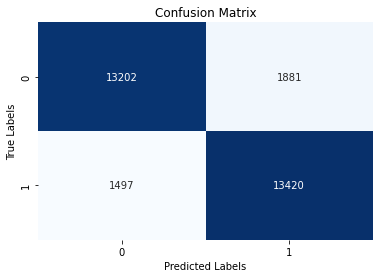

In [14]:
#Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cn, annot=True, cmap="Blues", fmt="g", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8770668583752695
Recall: 0.8996447006770798
F1-score: 0.8882123237805281


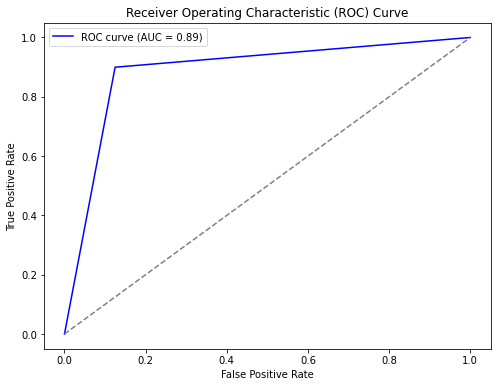

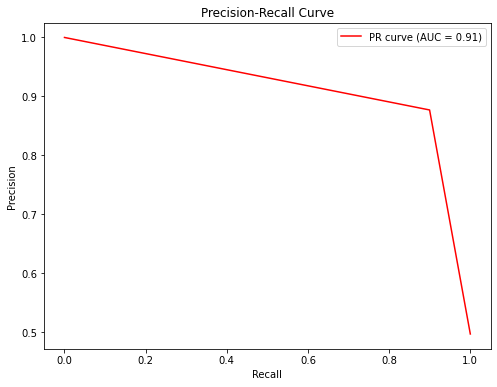

In [16]:
# Calculate ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate Precision-Recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()